# Data Cleaning and Pre-Processing

## Libraries

In [324]:
# main libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

# pre-processing
from sklearn.preprocessing import OrdinalEncoder
from sklearn.preprocessing import OneHotEncoder
from sklearn.compose import ColumnTransformer

## Data Cleaning


https://blog.enzymeadvisinggroup.com/redes-neuronales-artificiales-y-deep-learning

In [325]:
# Reading the initial DF
bank = pd.read_csv("../data/BankChurners.csv")

# Dropping the last two columns for avoiding problems on the analysis (DF owner explains it)
bank.drop(columns=["Naive_Bayes_Classifier_Attrition_Flag_Card_Category_Contacts_Count_12_mon_Dependent_count_Education_Level_Months_Inactive_12_mon_1",
                  "Naive_Bayes_Classifier_Attrition_Flag_Card_Category_Contacts_Count_12_mon_Dependent_count_Education_Level_Months_Inactive_12_mon_2"],
         inplace=True)

# Showing the head of the DF
bank.head()

,CLIENTNUM,Attrition_Flag,Customer_Age,Gender,Dependent_count,Education_Level,Marital_Status,Income_Category,Card_Category,Months_on_book,...,Months_Inactive_12_mon,Contacts_Count_12_mon,Credit_Limit,Total_Revolving_Bal,Avg_Open_To_Buy,Total_Amt_Chng_Q4_Q1,Total_Trans_Amt,Total_Trans_Ct,Total_Ct_Chng_Q4_Q1,Avg_Utilization_Ratio
0,768805383,Existing Customer,45,M,3,High School,Married,$60K - $80K,Blue,39,...,1,3,12691.0,777,11914.0,1.335,1144,42,1.625,0.061
1,818770008,Existing Customer,49,F,5,Graduate,Single,Less than $40K,Blue,44,...,1,2,8256.0,864,7392.0,1.541,1291,33,3.714,0.105
2,713982108,Existing Customer,51,M,3,Graduate,Married,$80K - $120K,Blue,36,...,1,0,3418.0,0,3418.0,2.594,1887,20,2.333,0.000
3,769911858,Existing Customer,40,F,4,High School,Unknown,Less than $40K,Blue,34,...,4,1,3313.0,2517,796.0,1.405,1171,20,2.333,0.760
4,709106358,Existing Customer,40,M,3,Uneducated,Married,$60K - $80K,Blue,21,...,1,0,4716.0,0,4716.0,2.175,816,28,2.500,0.000


In [326]:
# Identifying the dtypes of the DF
bank.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10127 entries, 0 to 10126
Data columns (total 21 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   CLIENTNUM                 10127 non-null  int64  
 1   Attrition_Flag            10127 non-null  object 
 2   Customer_Age              10127 non-null  int64  
 3   Gender                    10127 non-null  object 
 4   Dependent_count           10127 non-null  int64  
 5   Education_Level           10127 non-null  object 
 6   Marital_Status            10127 non-null  object 
 7   Income_Category           10127 non-null  object 
 8   Card_Category             10127 non-null  object 
 9   Months_on_book            10127 non-null  int64  
 10  Total_Relationship_Count  10127 non-null  int64  
 11  Months_Inactive_12_mon    10127 non-null  int64  
 12  Contacts_Count_12_mon     10127 non-null  int64  
 13  Credit_Limit              10127 non-null  float64
 14  Total_

In [327]:
# Using describe to check the quartiles and identify possible outliers
bank.describe()

,CLIENTNUM,Customer_Age,Dependent_count,Months_on_book,Total_Relationship_Count,Months_Inactive_12_mon,Contacts_Count_12_mon,Credit_Limit,Total_Revolving_Bal,Avg_Open_To_Buy,Total_Amt_Chng_Q4_Q1,Total_Trans_Amt,Total_Trans_Ct,Total_Ct_Chng_Q4_Q1,Avg_Utilization_Ratio
count,1.012700e+04,10127.000000,10127.000000,10127.000000,10127.000000,10127.000000,10127.000000,10127.000000,10127.000000,10127.000000,10127.000000,10127.000000,10127.000000,10127.000000,10127.000000
mean,7.391776e+08,46.325960,2.346203,35.928409,3.812580,2.341167,2.455317,8631.953698,1162.814061,7469.139637,0.759941,4404.086304,64.858695,0.712222,0.274894
std,3.690378e+07,8.016814,1.298908,7.986416,1.554408,1.010622,1.106225,9088.776650,814.987335,9090.685324,0.219207,3397.129254,23.472570,0.238086,0.275691
min,7.080821e+08,26.000000,0.000000,13.000000,1.000000,0.000000,0.000000,1438.300000,0.000000,3.000000,0.000000,510.000000,10.000000,0.000000,0.000000
25%,7.130368e+08,41.000000,1.000000,31.000000,3.000000,2.000000,2.000000,2555.000000,359.000000,1324.500000,0.631000,2155.500000,45.000000,0.582000,0.023000
50%,7.179264e+08,46.000000,2.000000,36.000000,4.000000,2.000000,2.000000,4549.000000,1276.000000,3474.000000,0.736000,3899.000000,67.000000,0.702000,0.176000
75%,7.731435e+08,52.000000,3.000000,40.000000,5.000000,3.000000,3.000000,11067.500000,1784.000000,9859.000000,0.859000,4741.000000,81.000000,0.818000,0.503000
max,8.283431e+08,73.000000,5.000000,56.000000,6.000000,6.000000,6.000000,34516.000000,2517.000000,34516.000000,3.397000,18484.000000,139.000000,3.714000,0.999000


In [328]:
# Checking if there are missing values
bank.isna().sum()

CLIENTNUM                   0
Attrition_Flag              0
Customer_Age                0
Gender                      0
Dependent_count             0
Education_Level             0
Marital_Status              0
Income_Category             0
Card_Category               0
Months_on_book              0
Total_Relationship_Count    0
Months_Inactive_12_mon      0
Contacts_Count_12_mon       0
Credit_Limit                0
Total_Revolving_Bal         0
Avg_Open_To_Buy             0
Total_Amt_Chng_Q4_Q1        0
Total_Trans_Amt             0
Total_Trans_Ct              0
Total_Ct_Chng_Q4_Q1         0
Avg_Utilization_Ratio       0
dtype: int64

In [329]:
# Filtering string columns for better identification. Later, counting the unique values per column
bank.select_dtypes(exclude=["int64", "float64"])

,Attrition_Flag,Gender,Education_Level,Marital_Status,Income_Category,Card_Category
0,Existing Customer,M,High School,Married,$60K - $80K,Blue
1,Existing Customer,F,Graduate,Single,Less than $40K,Blue
2,Existing Customer,M,Graduate,Married,$80K - $120K,Blue
3,Existing Customer,F,High School,Unknown,Less than $40K,Blue
4,Existing Customer,M,Uneducated,Married,$60K - $80K,Blue
...,...,...,...,...,...,...
10122,Existing Customer,M,Graduate,Single,$40K - $60K,Blue
10123,Attrited Customer,M,Unknown,Divorced,$40K - $60K,Blue
10124,Attrited Customer,F,High School,Married,Less than $40K,Blue
10125,Attrited Customer,M,Graduate,Unknown,$40K - $60K,Blue


In [330]:
bank.Attrition_Flag.value_counts()

Existing Customer    8500
Attrited Customer    1627
Name: Attrition_Flag, dtype: int64

In [331]:
bank.Gender.value_counts()

F    5358
M    4769
Name: Gender, dtype: int64

In [332]:
# Some unknown data appears
bank.Education_Level.value_counts()

Graduate         3128
High School      2013
Unknown          1519
Uneducated       1487
College          1013
Post-Graduate     516
Doctorate         451
Name: Education_Level, dtype: int64

In [333]:
# More unknown data
bank.Marital_Status.value_counts()

Married     4687
Single      3943
Unknown      749
Divorced     748
Name: Marital_Status, dtype: int64

In [334]:
# More unknown data
bank.Income_Category.value_counts()

Less than $40K    3561
$40K - $60K       1790
$80K - $120K      1535
$60K - $80K       1402
Unknown           1112
$120K +            727
Name: Income_Category, dtype: int64

In [335]:
bank.Card_Category.value_counts()

Blue        9436
Silver       555
Gold         116
Platinum      20
Name: Card_Category, dtype: int64

## Pre-Processing

### Numerical Pre-Processing

#### Finding Collinearity

For finding the collinearity, I will build a heatmap with the correlation between the different columns. After that, I will drop any column that doesn't have correlation at all or ones that have a high colinearity to avoid "noise" on the model.

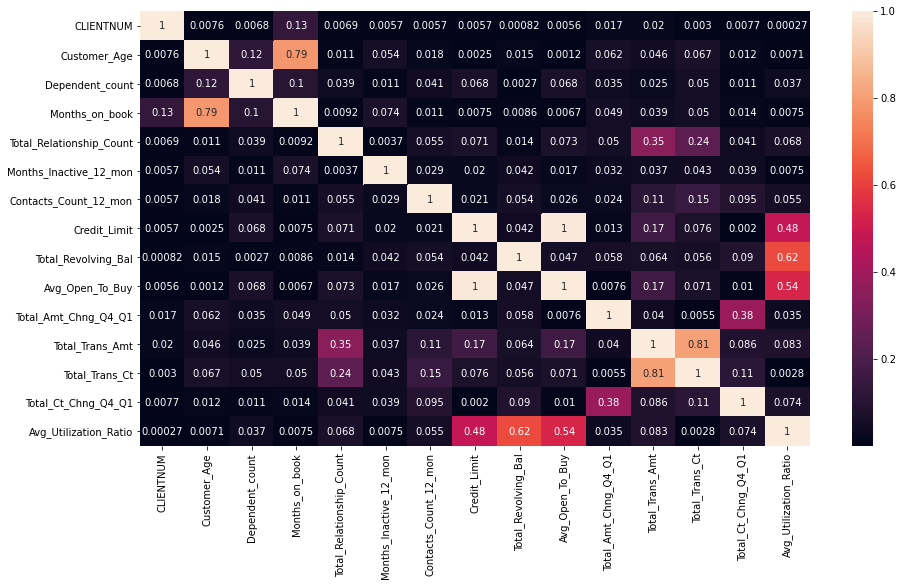

In [336]:
fig, ax = plt.subplots(1, 1, figsize=(15,8))

corrMatrix = bank.corr().abs()

sns.heatmap(corrMatrix, annot=True)

plt.show()

In [337]:
upper = corrMatrix.where(np.triu(np.ones(corrMatrix.shape), k=1).astype(np.bool))

to_drop = [column for column in upper.columns if any(upper[column] > 0.9)]
to_drop

['Avg_Open_To_Buy']

The column *Avg_Open_To_Buy* has a high collinearity, and the CLIENTUM doesn't provide any information. In fact, that column is a unique identifier. 

For that, both columns will be dropped from the **bank** dataframe.

In [338]:
# Dropping column with high collinearity and CLIENTUM, as it has low impact
bank.drop(columns=to_drop, inplace=True)
bank.drop(columns="CLIENTNUM", inplace=True)

Let's see if we can get more isnights building a pairplot. On the X axis, we will have the churn column, and the Y axis would be the rest of the DF.

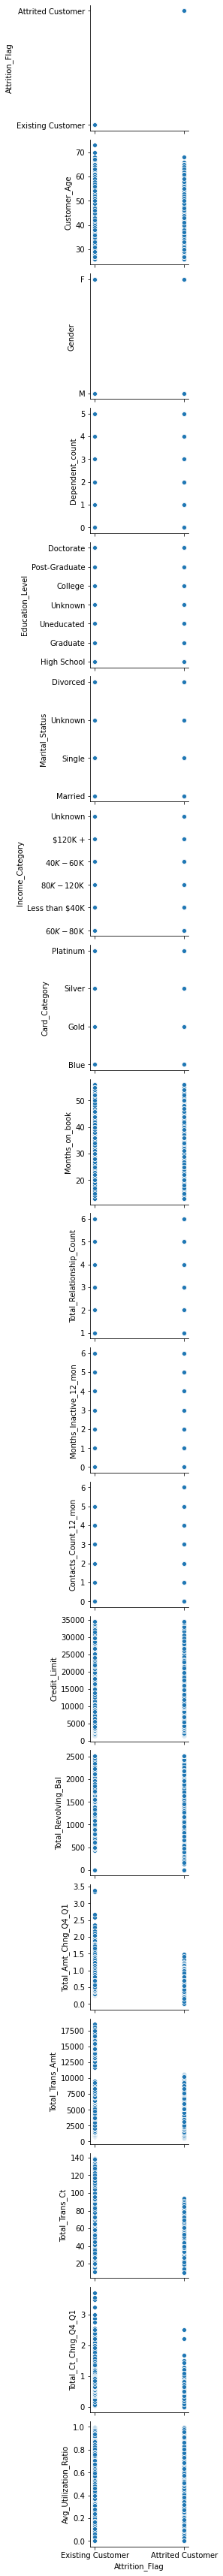

In [339]:
# Pairploting for identifying
sns.pairplot(data=bank, x_vars="Attrition_Flag", y_vars=bank.columns)

We can't get insights from the pairplot as the *Attrition_Flag* column (Churn) has only true or false inputs. As the X value is a string, we can't get insights right now. We will pospose this pairplot once everything is enconded.

Let's start finding the outliers

#### Finding Outliers

In [340]:
# Getting only numerical values for boxplotting
bank_numerical = bank.select_dtypes(["int64", "float64"])

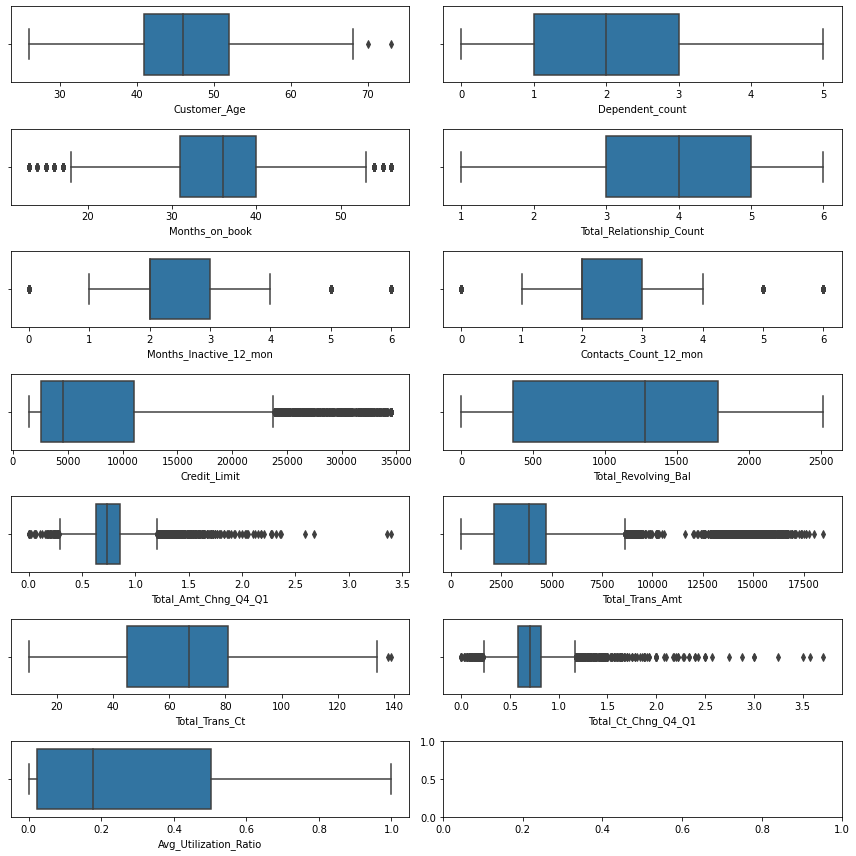

In [341]:
fig, axes = plt.subplots(7, 2, figsize=(12,12))

for i in range(2):
    # doing a loop for an easy boxplot creation
    try:
        sns.boxplot(bank_numerical[bank_numerical.columns[i]], ax = axes[0, i])
        sns.boxplot(bank_numerical[bank_numerical.columns[i+2]], ax = axes[1, i])
        sns.boxplot(bank_numerical[bank_numerical.columns[i+4]], ax = axes[2, i])
        sns.boxplot(bank_numerical[bank_numerical.columns[i+6]], ax = axes[3, i])
        sns.boxplot(bank_numerical[bank_numerical.columns[i+8]], ax = axes[4, i])
        sns.boxplot(bank_numerical[bank_numerical.columns[i+10]], ax = axes[5, i])
        sns.boxplot(bank_numerical[bank_numerical.columns[i+12]], ax = axes[6, i])
        
    except IndexError:
        pass


fig.tight_layout()
plt.show()

There are several outliers in some boxplots, the best would be to analyze them case by case and see if the amount is considerable to eliminate them. For knowing the amount of items that should be deleted, let's find the *IQR*.

In [342]:
Q1 = bank_numerical.quantile(0.25)
Q3 = bank_numerical.quantile(0.75)
IQR = Q3 - Q1
print(IQR)

Customer_Age                  11.000
Dependent_count                2.000
Months_on_book                 9.000
Total_Relationship_Count       2.000
Months_Inactive_12_mon         1.000
Contacts_Count_12_mon          1.000
Credit_Limit                8512.500
Total_Revolving_Bal         1425.000
Total_Amt_Chng_Q4_Q1           0.228
Total_Trans_Amt             2585.500
Total_Trans_Ct                36.000
Total_Ct_Chng_Q4_Q1            0.236
Avg_Utilization_Ratio          0.480
dtype: float64


In [343]:
# Creating a new variable were all those variables below or above Q1/Q3 are going to be removed
bank_numerical_outliers = bank_numerical[~((bank_numerical < (Q1 - 1.5 * IQR)) | 
                                           (bank_numerical > (Q3 + 1.5 * IQR))).any(axis=1)]

In [344]:
# Getting shape difference between the original DF and the one without outliers
diff = bank_numerical.shape[0] - bank_numerical_outliers.shape[0]

In [345]:
print(f"Shape Difference (in percentage): {diff / bank.shape[0]}\nFinal Shape: {bank.shape[0] - diff}")

Shape Difference (in percentage): 0.32734274711168165
Final Shape: 6812


If the outliers are removed, we are dropping almost 1/3 of the data. It's a high risk move, that's why this changes will not be applied on the original DF and it will be done in another CSV for further model testing, if possible.

In [346]:
# Copying for store this variable in a CSV. Will do a further analysis, if possible, training this model too
bank_outliers = bank.copy()

In [347]:
bank_numerical_outliers.columns

Index(['Customer_Age', 'Dependent_count', 'Months_on_book',
       'Total_Relationship_Count', 'Months_Inactive_12_mon',
       'Contacts_Count_12_mon', 'Credit_Limit', 'Total_Revolving_Bal',
       'Total_Amt_Chng_Q4_Q1', 'Total_Trans_Amt', 'Total_Trans_Ct',
       'Total_Ct_Chng_Q4_Q1', 'Avg_Utilization_Ratio'],
      dtype='object')

In [348]:
bank_outliers[['Customer_Age', 'Dependent_count', 'Months_on_book',
       'Total_Relationship_Count', 'Months_Inactive_12_mon',
       'Contacts_Count_12_mon', 'Credit_Limit', 'Total_Revolving_Bal',
       'Total_Amt_Chng_Q4_Q1', 'Total_Trans_Amt', 'Total_Trans_Ct',
       'Total_Ct_Chng_Q4_Q1', 'Avg_Utilization_Ratio']] = bank_numerical_outliers

In [349]:
bank_outliers.dropna(axis=0, inplace=True)

In [350]:
# Storing it into a CSV file
bank_outliers.to_csv("../data/bank_no_outliers.csv")

### Categorical Pre-Processing

As the results on the previous cleaning weren't not succesful, let's remain on the original DF, **bank**, and change the categorical variables to numerical. 

On the initial analysis, we were able to detect the different *unique* values per categorical object. Now, let's focus on do One-Hot Encoding or Ordinal Encoding

In [351]:
bank_categorical = bank.select_dtypes(include=["object"])

In [352]:
bank_categorical.columns

Index(['Attrition_Flag', 'Gender', 'Education_Level', 'Marital_Status',
       'Income_Category', 'Card_Category'],
      dtype='object')

#### Ordinal & OneHot Encoding 
Preparation of the "Dummies" column for the OneHot

In [353]:
# Getting the ordinal columns and the respective order per column

ordinals = ["Education_Level", "Income_Category", "Card_Category"]

Education_Level_Cat = ["Unknown", "Uneducated", "High School", "College", "Graduate",
                      "Post-Graduate", "Doctorate"]
Income_Category_Cat = ["Unknown", "Less than $40K", "$40K - $60K", "$60K - $80K", 
                       "$80K - $120K", "$120K +"]
Card_Category_Cat = ["Blue", "Silver", "Gold", "Platinum"]

cats_ord = [Education_Level_Cat, Income_Category_Cat, Card_Category_Cat]

# Creating the dummies variable for easy creation on the future
dummies = list(set(list(bank_categorical.columns)) - set(ordinals))

Using the *ColumnTransformer* function to create a pipeline for future *fit_transform*

In [354]:
# Transforming both columns, the One Hot and the Ordinal

categ_encoded_pipeline = ColumnTransformer([
    ("OrdEnconder", OrdinalEncoder(categories=cats_ord), ordinals),
    ("OneHotEnconder", OneHotEncoder(handle_unknown="error", drop="first"), dummies) #removing first column to reduce noise
])

In [355]:
categories_encoded = categ_encoded_pipeline.fit_transform(bank_categorical)

In [356]:
col_names_transformed = ordinals + list(categ_encoded_pipeline.named_transformers_["OneHotEnconder"].get_feature_names())

In [357]:
cat_encoded = pd.DataFrame(categories_encoded, columns=col_names_transformed)
cat_encoded

,Education_Level,Income_Category,Card_Category,x0_Married,x0_Single,x0_Unknown,x1_Existing Customer,x2_M
0,2.0,3.0,0.0,1.0,0.0,0.0,1.0,1.0
1,4.0,1.0,0.0,0.0,1.0,0.0,1.0,0.0
2,4.0,4.0,0.0,1.0,0.0,0.0,1.0,1.0
3,2.0,1.0,0.0,0.0,0.0,1.0,1.0,0.0
4,1.0,3.0,0.0,1.0,0.0,0.0,1.0,1.0
...,...,...,...,...,...,...,...,...
10122,4.0,2.0,0.0,0.0,1.0,0.0,1.0,1.0
10123,0.0,2.0,0.0,0.0,0.0,0.0,0.0,1.0
10124,2.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0
10125,4.0,2.0,0.0,0.0,0.0,1.0,0.0,1.0


### Merging

It's time to merge the encoded DF to the original one. I will use the **join** function, being able to set as suffix *"_drop"* and *"_encoded"* for identify the old and new columns better. 

After the merge, the old categorical columns will be dropped.

In [358]:
bank = bank.join(cat_encoded, lsuffix="_drop", rsuffix="_encoded")

bank.drop(columns=["Education_Level_drop", "Income_Category_drop", "Card_Category_drop", 
                   "Marital_Status", "Gender", "Attrition_Flag"], inplace=True)

In [359]:
# Now the initial DF has the correct column size. To be sure everything is correct, let's double-check the types
bank.head()

,Customer_Age,Dependent_count,Months_on_book,Total_Relationship_Count,Months_Inactive_12_mon,Contacts_Count_12_mon,Credit_Limit,Total_Revolving_Bal,Total_Amt_Chng_Q4_Q1,Total_Trans_Amt,...,Total_Ct_Chng_Q4_Q1,Avg_Utilization_Ratio,Education_Level_encoded,Income_Category_encoded,Card_Category_encoded,x0_Married,x0_Single,x0_Unknown,x1_Existing Customer,x2_M
0,45,3,39,5,1,3,12691.0,777,1.335,1144,...,1.625,0.061,2.0,3.0,0.0,1.0,0.0,0.0,1.0,1.0
1,49,5,44,6,1,2,8256.0,864,1.541,1291,...,3.714,0.105,4.0,1.0,0.0,0.0,1.0,0.0,1.0,0.0
2,51,3,36,4,1,0,3418.0,0,2.594,1887,...,2.333,0.000,4.0,4.0,0.0,1.0,0.0,0.0,1.0,1.0
3,40,4,34,3,4,1,3313.0,2517,1.405,1171,...,2.333,0.760,2.0,1.0,0.0,0.0,0.0,1.0,1.0,0.0
4,40,3,21,5,1,0,4716.0,0,2.175,816,...,2.500,0.000,1.0,3.0,0.0,1.0,0.0,0.0,1.0,1.0


In [360]:
# As now there are only int and float types, we can store this DF as a CSV
bank.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10127 entries, 0 to 10126
Data columns (total 21 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Customer_Age              10127 non-null  int64  
 1   Dependent_count           10127 non-null  int64  
 2   Months_on_book            10127 non-null  int64  
 3   Total_Relationship_Count  10127 non-null  int64  
 4   Months_Inactive_12_mon    10127 non-null  int64  
 5   Contacts_Count_12_mon     10127 non-null  int64  
 6   Credit_Limit              10127 non-null  float64
 7   Total_Revolving_Bal       10127 non-null  int64  
 8   Total_Amt_Chng_Q4_Q1      10127 non-null  float64
 9   Total_Trans_Amt           10127 non-null  int64  
 10  Total_Trans_Ct            10127 non-null  int64  
 11  Total_Ct_Chng_Q4_Q1       10127 non-null  float64
 12  Avg_Utilization_Ratio     10127 non-null  float64
 13  Education_Level_encoded   10127 non-null  float64
 14  Income

In [361]:
# File Stored as a CSV, ready to start testing some models
bank.to_csv("../data/bank_processed_data.csv")